# Tech Layoffs Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/jianjun/Desktop/JupyterWorkspace/PythonProjects/Layoffs/layoffs_latest.csv')
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,The Good Glamm Group,New Delhi,Retail,150.0,0.15,2024-04-18,Unknown,India,180.0
1,Stability AI,London,AI,20.0,NaN,2024-04-18,Unknown,United Kingdom,174.0
2,ConnectWise,Tampa Bay,Other,NaN,NaN,2024-04-17,Acquired,United States,1.0
3,Google,SF Bay Area,Consumer,NaN,NaN,2024-04-17,Post-IPO,United States,26.0
4,Rivian,Detroit,Transportation,NaN,0.01,2024-04-17,Post-IPO,United States,10700.0


## Data Cleaning

In [3]:
df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,2338.000000,2295.000000,3186.000000
mean,256.677502,0.279594,787.537349
std,831.752545,0.286055,4785.029585
min,3.000000,0.000000,0.000000
25%,40.000000,0.100000,51.000000
50%,80.000000,0.170000,165.000000
75%,184.000000,0.300000,463.750000
max,14000.000000,1.000000,121900.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3566 entries, 0 to 3567
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3566 non-null   object 
 1   location             3565 non-null   object 
 2   industry             3565 non-null   object 
 3   total_laid_off       2336 non-null   float64
 4   percentage_laid_off  2293 non-null   float64
 5   date                 3566 non-null   object 
 6   stage                3559 non-null   object 
 7   country              3566 non-null   object 
 8   funds_raised         3184 non-null   float64
dtypes: float64(3), object(6)
memory usage: 278.6+ KB


In [10]:
df.isnull().sum()

company                   0
location                  1
industry                  1
total_laid_off         1230
percentage_laid_off    1273
date                      0
stage                     7
country                   0
funds_raised            382
dtype: int64

In [11]:
df.shape

(3566, 9)

In [13]:
#replace NULL values in numerical columns with 0s
df['total_laid_off'] = df['total_laid_off'].fillna(0)
df['percentage_laid_off'] = df['percentage_laid_off'].fillna(0)
df['funds_raised'] = df['funds_raised'].fillna(0)

In [14]:
df.isnull().sum()

company                0
location               1
industry               1
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  7
country                0
funds_raised           0
dtype: int64

In [15]:
df.shape

(3566, 9)

In [16]:
df = df[df['location'].notnull()]
df = df[df['industry'].notnull()]
df = df[df['stage'].notnull()]

In [17]:
df.shape

(3557, 9)

In [18]:
df.isnull().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

### change data type to proper format

In [20]:
df['total_laid_off'] = df['total_laid_off'].astype(int)
df['date'] = pd.to_datetime(df['date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3557 entries, 0 to 3567
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              3557 non-null   object        
 1   location             3557 non-null   object        
 2   industry             3557 non-null   object        
 3   total_laid_off       3557 non-null   int64         
 4   percentage_laid_off  3557 non-null   float64       
 5   date                 3557 non-null   datetime64[ns]
 6   stage                3557 non-null   object        
 7   country              3557 non-null   object        
 8   funds_raised         3557 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 277.9+ KB


In [4]:
df.duplicated().sum()

2

In [5]:
df[df.duplicated()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
2090,Beyond Meat,Los Angeles,Food,200.0,0.19,2022-10-14,Post-IPO,United States,122.0
2701,Cazoo,London,Transportation,750.0,0.15,2022-06-07,Post-IPO,United Kingdom,2000.0


In [6]:
# Dropping the duplicate values
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

company                   0
location                  1
industry                  1
total_laid_off         1230
percentage_laid_off    1273
date                      0
stage                     7
country                   0
funds_raised            382
dtype: int64

### add columns: Year, Year_Quarter, and Year_Month

In [22]:
df['Year'] = df['date'].dt.year

df['Year_Quarter'] = df['date'].dt.to_period('Q')
# df['Year_Quarter'] = df['year'].astype(str) + '-Q' + df['quarter'].astype(str)

df['Year_Month'] = df['date'].dt.month

In [23]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,Year,Year_Quarter,Year_Month
0,The Good Glamm Group,New Delhi,Retail,150,0.15,2024-04-18,Unknown,India,180.0,2024,2024Q2,4
1,Stability AI,London,AI,20,0.00,2024-04-18,Unknown,United Kingdom,174.0,2024,2024Q2,4
2,ConnectWise,Tampa Bay,Other,0,0.00,2024-04-17,Acquired,United States,1.0,2024,2024Q2,4
3,Google,SF Bay Area,Consumer,0,0.00,2024-04-17,Post-IPO,United States,26.0,2024,2024Q2,4
4,Rivian,Detroit,Transportation,0,0.01,2024-04-17,Post-IPO,United States,10700.0,2024,2024Q2,4


### Data is Ready!

## Data Exploration

In [25]:
import pygwalker as pyg

walker = pyg.walk(df)

NotImplementedException: Not implemented Error: Data type 'period[Q-DEC]' not recognized

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3557 entries, 0 to 3567
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              3557 non-null   object        
 1   location             3557 non-null   object        
 2   industry             3557 non-null   object        
 3   total_laid_off       3557 non-null   int64         
 4   percentage_laid_off  3557 non-null   float64       
 5   date                 3557 non-null   datetime64[ns]
 6   stage                3557 non-null   object        
 7   country              3557 non-null   object        
 8   funds_raised         3557 non-null   float64       
 9   Year                 3557 non-null   int32         
 10  Year_Quarter         3557 non-null   period[Q-DEC] 
 11  Year_Month           3557 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(5), period[Q-DEC](1)
memory usage:

In [29]:
# add a new Quarter column
df['Year_Quarter1'] = df['Year'].astype(str) + '-Q' + df['date'].dt.quarter.astype(str)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3557 entries, 0 to 3567
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              3557 non-null   object        
 1   location             3557 non-null   object        
 2   industry             3557 non-null   object        
 3   total_laid_off       3557 non-null   int64         
 4   percentage_laid_off  3557 non-null   float64       
 5   date                 3557 non-null   datetime64[ns]
 6   stage                3557 non-null   object        
 7   country              3557 non-null   object        
 8   funds_raised         3557 non-null   float64       
 9   Year                 3557 non-null   int32         
 10  Year_Quarter         3557 non-null   period[Q-DEC] 
 11  Year_Month           3557 non-null   int32         
 12  Year_Quarter1        3557 non-null   object        
dtypes: datetime64[ns](1), float64(2), int3

In [32]:
walker = pyg.walk(df[['company', 'location', 'industry', 'total_laid_off', 'percentage_laid_off', 
                      'date', 'stage', 'country', 'funds_raised', 'Year', 'Year_Quarter1', 'Year_Month']])

Box(children=(HTML(value='<div id="ifr-pyg-000617798c72f607ijqwsJh2GMQoSx91" style="height: auto">\n    <head>…

### Based on quick exploration using PyGWalker, one can do the following analysis and visulization.

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [120]:
# Formatting function to convert large numbers to 'k' format
def format_k(value, pos):
    k = value / 1000
    return f'{k:g}k' if k.is_integer() else f'{k:.1f}k'

### Year_Quarter vs. total_laid_off

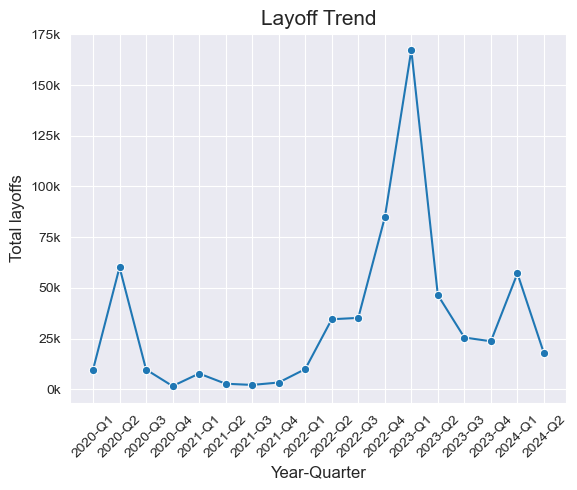

In [156]:
# Group by 'year_quarter' and sum 'total_laid_off', then reset the index to use in Seaborn plot
grouped_df = df.groupby('Year_Quarter1')['total_laid_off'].sum().reset_index()

ax = sns.lineplot(x='Year_Quarter1', y='total_laid_off', data=grouped_df, marker="o")

# # Calculate the trendline
# # Convert 'year_quarter' to a numeric value for the trend calculation, maybe using its index
# # If 'grouped_df' doesn't have many rows, using the index is a straightforward approach.
# x_numeric = np.arange(len(grouped_df))
# z = np.polyfit(x_numeric, grouped_df['total_laid_off'], 1)
# p = np.poly1d(z)

# plt.plot(grouped_df['year_quarter'], p(x_numeric), "r--")

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Total layoffs', fontsize=12)
plt.title('Layoff Trend', fontsize=15)

# Apply formatting to the y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_k))

plt.show()

### company vs. total_laid_off

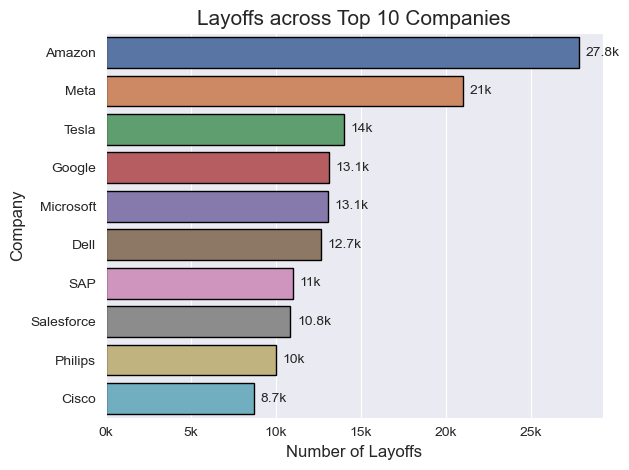

In [151]:
LayoffsByCompany = df.groupby('company')['total_laid_off'].sum().reset_index().sort_values('total_laid_off', ascending=False)
Top10Companies_count = LayoffsByCompany.head(10)

ax = sns.barplot(
    data=Top10Companies_count, 
    x='total_laid_off', 
    y='company', 
    width=0.8,  # Width less than 1 for spacing between bars
    edgecolor='black', 
    palette='deep'
)
plt.xlabel('Number of Layoffs', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.title('Layoffs across Top 10 Companies', fontsize=15)

# Apply formatting to the x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_k))

# Iterate through the list of bars and annotate
for bar in ax.patches:
    # Get the bar's width, the number of layoffs
    bar_width = bar.get_width()
    
    # Annotate with formatted 'k', one decimal place
    label = format_k(bar_width, None)
    
    ax.annotate(label,
                xy=(bar_width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),  # Offset from the end of the bar
                textcoords="offset points",  # Offset in pixels
                ha='left', va='center',  # Alignment
                fontsize=10)

plt.tight_layout()
plt.show()

### industry vs. total_laid_off

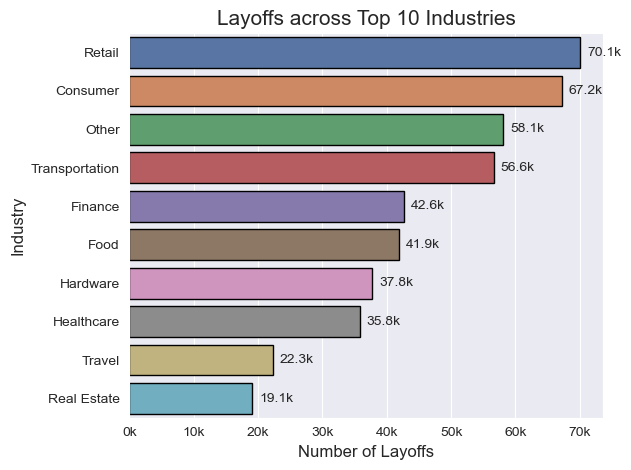

In [150]:
LayoffsByIndustry = df.groupby('industry')['total_laid_off'].sum().reset_index().sort_values('total_laid_off', ascending=False)
Top10Industries_count = LayoffsByIndustry.head(10)

ax = sns.barplot(
    data=Top10Industries_count, 
    x='total_laid_off', 
    y='industry', 
    width=0.8,  # Width less than 1 for spacing between bars
    edgecolor='black', 
    palette='deep'
)
plt.xlabel('Number of Layoffs', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.title('Layoffs across Top 10 Industries', fontsize=15)

# Apply formatting to the x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_k))

# Iterate through the list of bars and annotate
for bar in ax.patches:
    # Get the bar's width, the number of layoffs
    bar_width = bar.get_width()
    
    # Annotate with formatted 'k', one decimal place
    label = format_k(bar_width, None)
    
    ax.annotate(label,
                xy=(bar_width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),  # Offset from the end of the bar
                textcoords="offset points",  # Offset in pixels
                ha='left', va='center',  # Alignment
                fontsize=10)

plt.tight_layout()
plt.show()

### industry vs. percentage_laid_off

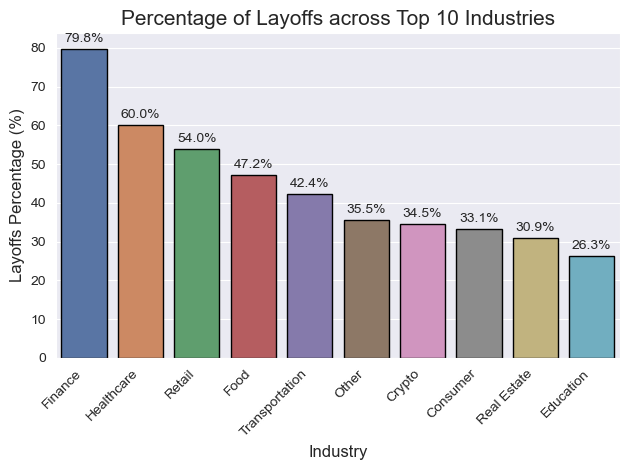

In [187]:
LayoffsPercentageByIndustry = df.groupby('industry')['percentage_laid_off'].sum().reset_index().sort_values('percentage_laid_off', ascending=False)
Top10Industries_percent = LayoffsPercentageByIndustry.head(10)

ax = sns.barplot(
    data=Top10Industries_percent, 
    y='percentage_laid_off', 
    x='industry',
    width=0.8,
    edgecolor='black',
    palette='deep'
)

plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Layoffs Percentage (%)', fontsize=12)
plt.title('Percentage of Layoffs across Top 10 Industries', fontsize=15)

# Annotating each bar with its corresponding percentage
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',  
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),  # Offset the text 3 points above the bar
                textcoords="offset points",
                ha='center', 
                va='bottom', 
                fontsize=10)

plt.tight_layout()
plt.show()

### location vs. total_laid_off

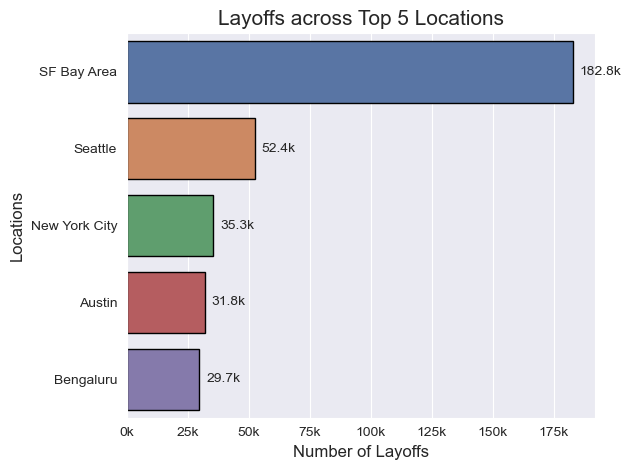

In [159]:
LayoffsByLocation = df.groupby('location')['total_laid_off'].sum().reset_index().sort_values('total_laid_off', ascending=False)
Top5Locations = LayoffsByLocation.head()

ax = sns.barplot(
    data=Top5Locations, 
    x='total_laid_off', 
    y='location', 
    width=0.8,
    edgecolor='black', 
    palette='deep'
)
plt.xlabel('Number of Layoffs', fontsize=12)
plt.ylabel('Locations', fontsize=12)
plt.title('Layoffs across Top 5 Locations', fontsize=15)

# Apply formatting to the x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_k))

# Iterate through the list of bars and annotate
for bar in ax.patches:
    # Get the bar's width, the number of layoffs
    bar_width = bar.get_width()
    
    # Annotate with formatted 'k', one decimal place
    label = format_k(bar_width, None)
    
    ax.annotate(label,
                xy=(bar_width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),  # Offset from the end of the bar
                textcoords="offset points",  # Offset in pixels
                ha='left', va='center',  # Alignment
                fontsize=10)

plt.tight_layout()
plt.show()

### country vs. total_laid_off

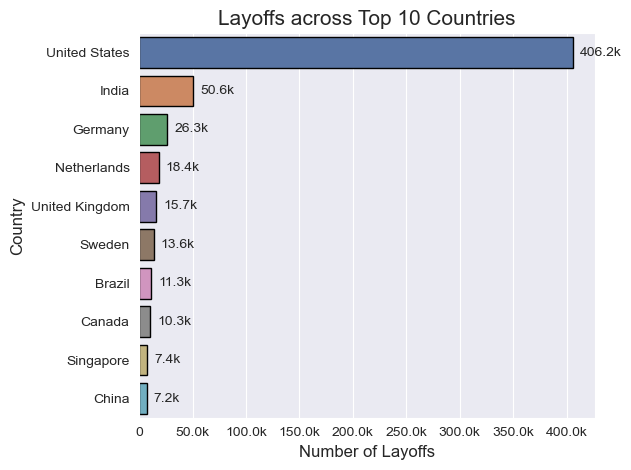

In [189]:
LayoffsByCountry = df.groupby('country')['total_laid_off'].sum().reset_index().sort_values('total_laid_off', ascending=False)
Top10Countries = LayoffsByCountry.head(10)

ax = sns.barplot(
    data=Top10Countries, 
    x='total_laid_off', 
    y='country', 
    width=0.8, 
    edgecolor='black', 
    palette='deep'
)
plt.xlabel('Number of Layoffs', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Layoffs across Top 10 Countries', fontsize=15)

# Apply formatting to the x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_k))

# Iterate through the list of bars and annotate
for bar in ax.patches:
    # Get the bar's width, the number of layoffs
    bar_width = bar.get_width()
    
    # Annotate with formatted 'k', one decimal place
    label = format_k(bar_width, None)
    
    ax.annotate(label,
                xy=(bar_width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),  # Offset from the end of the bar
                textcoords="offset points",  # Offset in pixels
                ha='left', va='center',  # Alignment
                fontsize=10)

plt.tight_layout()
plt.show()

In [225]:
source = df.groupby('country')['total_laid_off'].sum().reset_index()

fig = px.choropleth(source,
                    locations='country',
                    locationmode='country names',
                    color='total_laid_off',
                    hover_name='country',
                    projection='natural earth',
                    title='Total Layoffs by Country',
                    color_continuous_scale=px.colors.sequential.Sunset,  # Using a Sunset color scale that includes yellow
)

fig.update_geos(
    visible=True,  # Makes all countries visible
    showcountries=True,  # Show country outlines
    countrycolor="LightGrey"  # Sets the color of countries without data
)

fig.show()

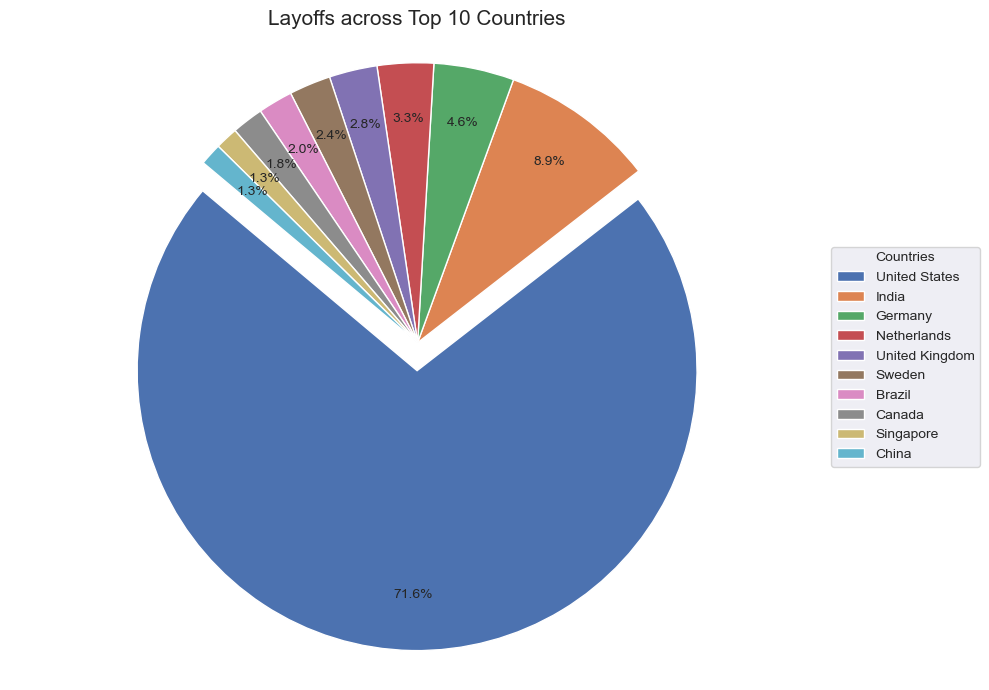

In [217]:
Top10Countries = LayoffsByCountry.head(10)
# Determine the 'explode' offsets for each slice (for the top 10 countries)
explode_values = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Explode the first slice

plt.figure(figsize=(10,7))  # Adjust the figure size as needed
plt.pie(
    Top10Countries['total_laid_off'],
    explode=explode_values,
    labels=None,  # Remove this if you will use legend for labels
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('deep', n_colors=10),  
    pctdistance=0.8  # =1 is on the margin, =1.1 will be outside
)

plt.title('Layoffs across Top 10 Countries', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

plt.legend(
    labels=Top10Countries['country'],
    title="Countries",
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # Adjust legend position
)

plt.tight_layout()
plt.show()

### stage vs. toal_laid_off  and  stage vs. percentage_laif_off

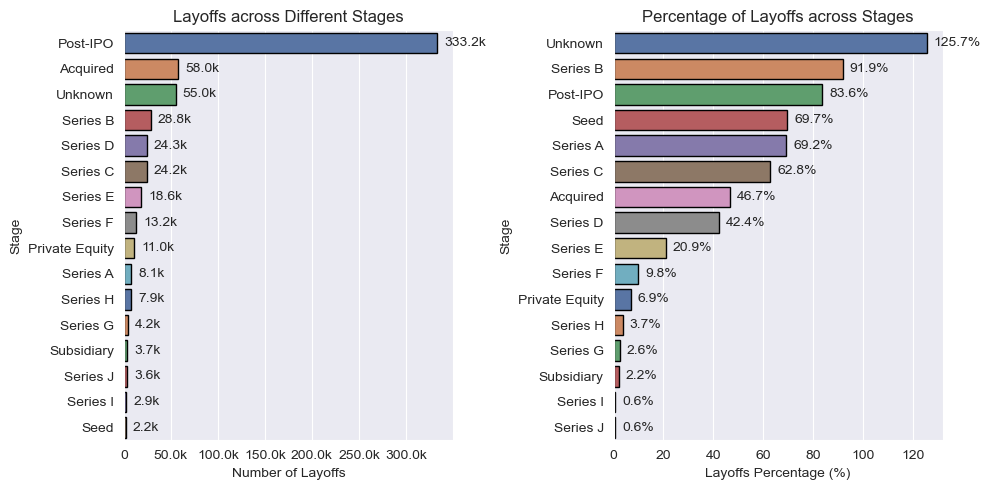

In [180]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#1
LayoffsByStage = df.groupby('stage')['total_laid_off'].sum().reset_index().sort_values('total_laid_off', ascending=False)
sns.barplot(
    data=LayoffsByStage, 
    x='total_laid_off', 
    y='stage', 
    width=0.8,
    edgecolor='black', 
    palette='deep',
    ax=ax[0]
)

ax[0].set_xlabel('Number of Layoffs', fontsize=10)
ax[0].set_ylabel('Stage', fontsize=10)
ax[0].set_title('Layoffs across Different Stages', fontsize=12)

# Apply formatting to the x-axis for the first plot
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(format_k))

# Annotating bars of the first plot
for bar in ax[0].patches:
    bar_width = bar.get_width()
    label = format_k(bar_width, None)
    ax[0].annotate(label,
                   xy=(bar_width, bar.get_y() + bar.get_height() / 2),
                   xytext=(5, 0),  # Offset from the end of the bar
                   textcoords="offset points",  # Offset in pixels
                   ha='left', va='center',  # Alignment
                   fontsize=10)


#2
LayoffsPercentageByIndustry = df.groupby('stage')['percentage_laid_off'].sum().reset_index().sort_values('percentage_laid_off', ascending=False)
sns.barplot(
    data=LayoffsPercentageByIndustry, 
    x='percentage_laid_off', 
    y='stage',
    width=0.8,
    edgecolor='black', 
    palette='deep',
    ax=ax[1]
)

ax[1].set_xlabel('Layoffs Percentage (%)', fontsize=10)
ax[1].set_ylabel('Stage', fontsize=10)
ax[1].set_title('Percentage of Layoffs across Stages', fontsize=12)

# Annotating bars of the second plot
for p in ax[1].patches:
    width = p.get_width()
    ax[1].annotate(f'{width:.1f}%', 
                   xy=(width, p.get_y() + p.get_height() / 2),
                   xytext=(5, 0),  # Offset the text 5 points to the right
                   textcoords="offset points",
                   ha='left', 
                   va='center', 
                   fontsize=10)


plt.tight_layout()
plt.show()

### company vs. funds_raised   and   industry vs. funds_raised

In [256]:
df['company'] = df['company'].astype('str')

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3557 entries, 0 to 3567
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              3557 non-null   object        
 1   location             3557 non-null   object        
 2   industry             3557 non-null   object        
 3   total_laid_off       3557 non-null   int64         
 4   percentage_laid_off  3557 non-null   float64       
 5   date                 3557 non-null   datetime64[ns]
 6   stage                3557 non-null   object        
 7   country              3557 non-null   object        
 8   funds_raised         3557 non-null   float64       
 9   Year                 3557 non-null   int32         
 10  Year_Quarter         3557 non-null   period[Q-DEC] 
 11  Year_Month           3557 non-null   int32         
 12  Year_Quarter1        3557 non-null   object        
dtypes: datetime64[ns](1), float64(2), int3

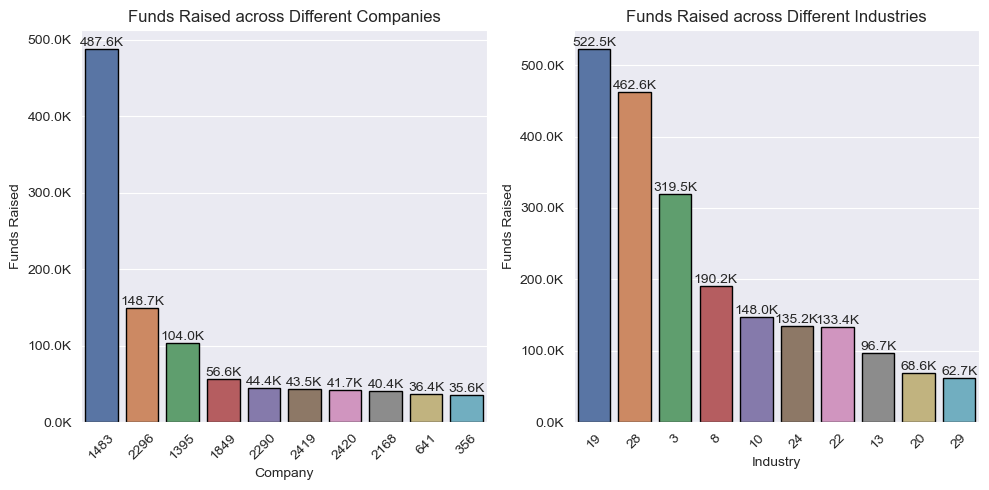

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot #1 - Funds Raised across Different Companies
FundsByCompany = df.groupby('company')['funds_raised'].sum().reset_index().sort_values('funds_raised', ascending=False)

# Create the first barplot
bar1 = sns.barplot(
    data=FundsByCompany.head(10), 
    y='funds_raised', 
    x='company', 
    width=0.8,
    edgecolor='black', 
    palette='deep',
    ax=ax[0]
)

# Add labels formatted in 'K' with one decimal to the top of the bars in the first plot
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width() / 2., p.get_height(), format_k(p.get_height(), None), 
            fontsize=10, ha='center', va='bottom')

ax[0].set_ylabel('Funds Raised', fontsize=10)
ax[0].set_xlabel('Company', fontsize=10)
ax[0].set_title('Funds Raised across Different Companies', fontsize=12)
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(format_k))
ax[0].tick_params(axis='x', rotation=45)

# Plot #2 - Funds Raised across Different Industries
FundsRaisedByIndustry = df.groupby('industry')['funds_raised'].sum().reset_index().sort_values('funds_raised', ascending=False)

# Create the second barplot
bar2 = sns.barplot(
    data=FundsRaisedByIndustry.head(10), 
    y='funds_raised', 
    x='industry',
    width=0.8,
    edgecolor='black', 
    palette='deep',
    ax=ax[1]
)

# Add labels formatted in 'K' with one decimal to the top of the bars in the second plot
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width() / 2., p.get_height(), format_k(p.get_height(), None), 
            fontsize=10, ha='center', va='bottom')

ax[1].set_xlabel('Industry', fontsize=10)
ax[1].set_ylabel('Funds Raised', fontsize=10)
ax[1].set_title('Funds Raised across Different Industries', fontsize=12)
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(format_k))
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()